Shakshi Singh Rajput

U21EC138

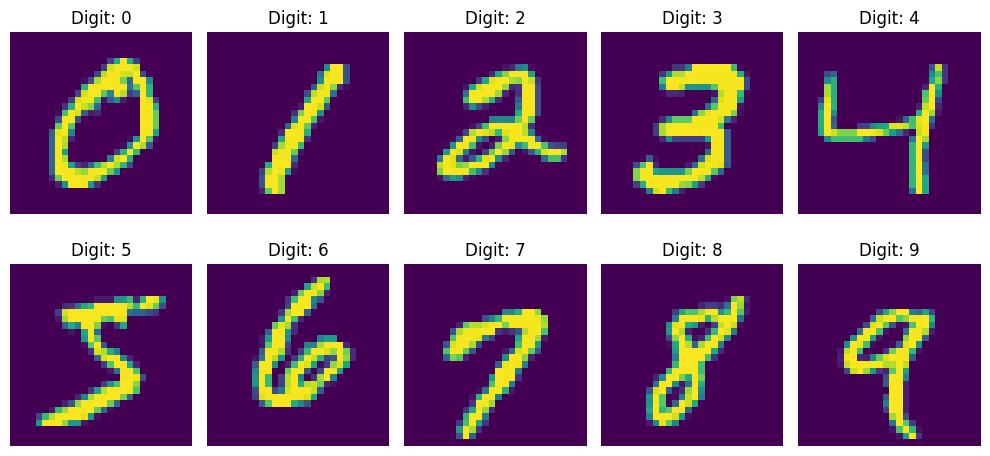

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


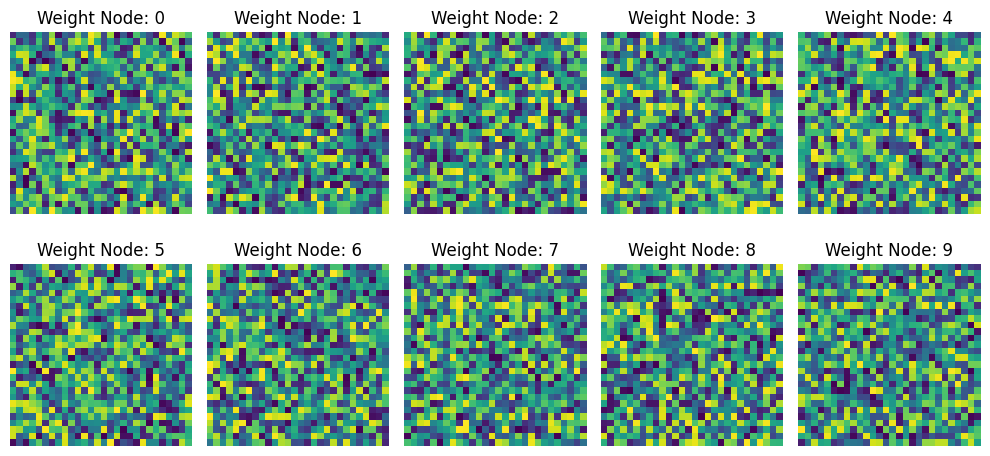

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8125 - loss: 0.7137
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9144 - loss: 0.3054
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9205 - loss: 0.2872
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9218 - loss: 0.2767
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9233 - loss: 0.2719


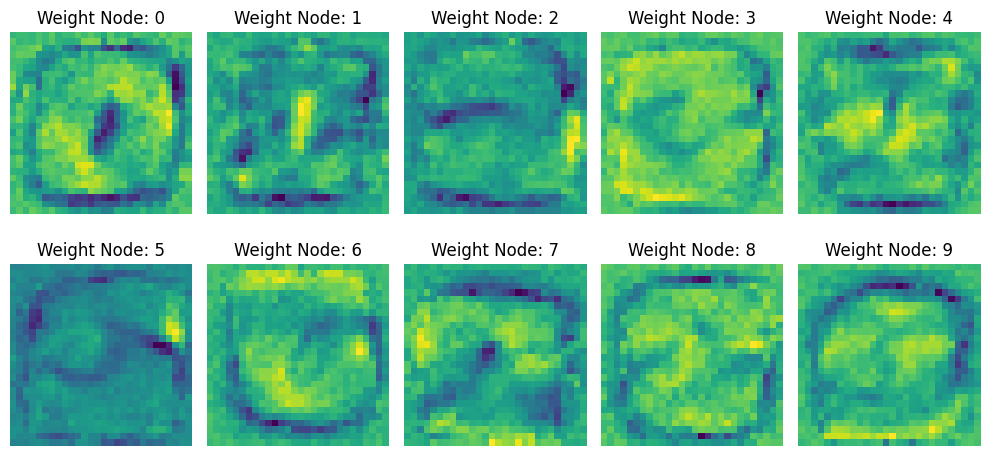

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.9269

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.97      0.98      0.97      1135
           2       0.94      0.90      0.91      1032
           3       0.91      0.91      0.91      1010
           4       0.92      0.94      0.93       982
           5       0.91      0.87      0.89       892
           6       0.94      0.95      0.95       958
           7       0.94      0.91      0.93      1028
           8       0.87      0.90      0.89       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



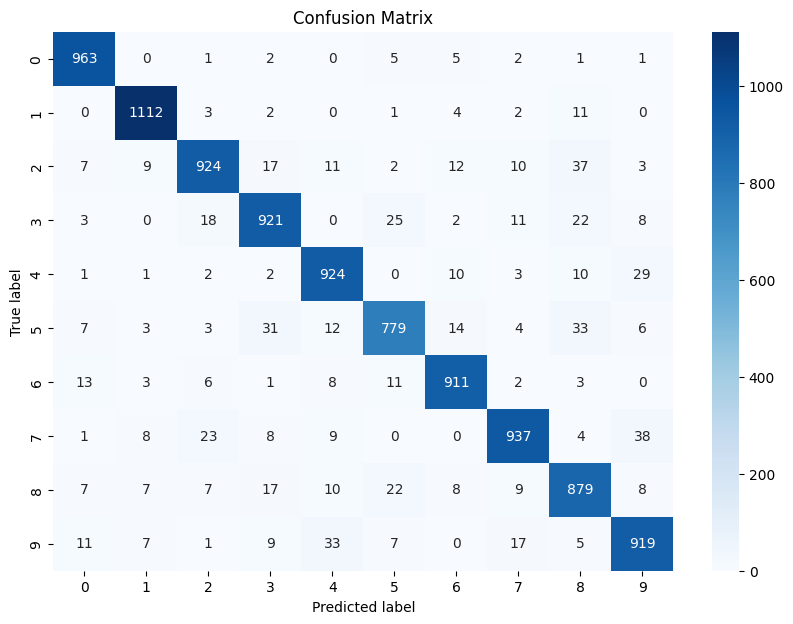

Conclusion: The simple one-layer neural network has been trained successfully on the MNIST dataset. The weights before and after training show how the model has adapted to recognize different digits. The accuracy achieved indicates the effectiveness of the model for this classification task.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Step 1: Import the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Step 2: Split and normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Step 3: Convert labels to one hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Step 4: Plot all digits
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[y_train.argmax(axis=1) == i][0], cmap='viridis')
    plt.axis('off')
    plt.title(f'Digit: {i}')
plt.tight_layout()
plt.show()

# Step 5: Define a simple one layer neural network
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(10, activation='softmax'))

# Step 6: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 7: Visualize the weights for each node before training
initial_weights = model.layers[1].get_weights()[0]
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(initial_weights[:, i].reshape(28, 28), cmap='viridis')
    plt.axis('off')
    plt.title(f'Weight Node: {i}')
plt.tight_layout()
plt.show()

# Step 8: Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, verbose=1)

# Step 9: Visualize the weights for each node after training
trained_weights = model.layers[1].get_weights()[0]
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(trained_weights[:, i].reshape(28, 28), cmap='viridis')
    plt.axis('off')
    plt.title(f'Weight Node: {i}')
plt.tight_layout()
plt.show()

# Step 10: Evaluate the model
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Classification accuracy
accuracy = np.mean(y_pred_classes == y_true_classes)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes))

# Confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# Step 11: Conclusion
print("Conclusion: The simple one-layer neural network has been trained successfully on the MNIST dataset. The weights before and after training show how the model has adapted to recognize different digits. The accuracy achieved indicates the effectiveness of the model for this classification task.")
